In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 56.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install -q sentence-transformers transformers sentencepiece pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.6/587.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# 1 Embedding model
embed_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")  # 384 dim

# 2️ Generation model
gen_model_name = "google/flan-t5-small"
tokenizer = AutoTokenizer.from_pretrained(gen_model_name)
gen_model = AutoModelForSeq2SeqLM.from_pretrained(gen_model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
!pip install -U ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
keypoint_model = YOLO("/content/drive/MyDrive/Cattle_Pose_Model/Cattle_Pose_Model/best.pt")
breed_model = YOLO("/content/drive/MyDrive/breed_obj_detection/run_cleaned3/weights/best.pt")

# Embedding model
embed_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")  # 384-dim embeddings

# Text generation model
gen_model_name = "google/flan-t5-small"
tokenizer = AutoTokenizer.from_pretrained(gen_model_name)
gen_model = AutoModelForSeq2SeqLM.from_pretrained(gen_model_name)

print(" Models loaded successfully.")

Step 2: Models loaded successfully.


In [ ]:
# --- Step 3: Pinecone Setup ---
import os
from pinecone import Pinecone, ServerlessSpec


os.environ["PINECONE_API_KEY"] = "pcsk_6q1DjW_Ew7zauktgZ3qiykoEAikosuzKsgL428au2XxjiG32uQyugBMTQR1epyTmbQwdyp"

pc = Pinecone(api_key=os.environ["PINECONE_API_KEY"])

index_name = "cattle-emb-384"

# Create index if it doesn't exist
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1")
    )

# Connect to the index
index = pc.Index(index_name)
print(" Pinecone index ready:", index_name)


Step 3: Pinecone index ready: cattle-emb-384


In [ ]:
# --- Step 4: Sample Embeddings and Upsert ---
from sentence_transformers import SentenceTransformer

# Initialize embedding model
embed_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")  # 384-dim

# Sample knowledge base texts
texts = [
    "Cows need 30-50 liters of water daily.",
    "Jersey cows produce high butterfat milk.",
    "Foot and Mouth Disease is common in cattle."
]

# Generate embeddings
embeddings = embed_model.encode(texts)

# Prepare vectors for Pinecone
vectors = [
    (f"id-{i}", embeddings[i].tolist(), {"text": texts[i]})
    for i in range(len(texts))
]

# Upsert vectors into Pinecone index
index.upsert(vectors=vectors)
print(" Sample texts inserted into Pinecone")


 Sample texts inserted into Pinecone


In [ ]:
from google.colab import files


uploaded = files.upload()


for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving 1.jpg to 1.jpg
Uploaded file: 1.jpg


In [ ]:
from google.colab import files

# Upload image from your computer
uploaded = files.upload()

# Get the path of the uploaded image
img_path = list(uploaded.keys())[0]
print("Uploaded image path:", img_path)


Saving 1.jpg to 1 (1).jpg
Uploaded image path: 1 (1).jpg


In [ ]:
image_path = "/content/1.jpg"
results = breed_model.predict(image_path, save=True)


image 1/1 /content/1.jpg: 448x640 1 Ayrshire cattle, 575.7ms
Speed: 16.4ms preprocess, 575.7ms inference, 33.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


In [ ]:
# --- Imports ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
keypoint_model = YOLO("/content/drive/MyDrive/Cattle_Pose_Model/Cattle_Pose_Model/best.pt")
breed_model = YOLO("/content/drive/MyDrive/breed_obj_detection/run_cleaned3/weights/best.pt")
img_path = "/content/drive/MyDrive/1.jpg"
img = cv2.imread(img_path)
# --- Breed detection ---
breed_results = breed_model(img_path)
for r in breed_results:
    boxes = r.boxes
    for box in boxes:
        cls_id = int(box.cls[0])
        breed_name = r.names[cls_id]
        confidence = float(box.conf[0])
        # Bounding box
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        print(f"Breed: {breed_name}, Confidence: {confidence}")
        print(f"Bounding Box: ({x1},{y1}) -> ({x2},{y2})")

# --- Keypoint detection ---
kp_results = keypoint_model(img_path)
if kp_results[0].keypoints is not None:
    keypoints = kp_results[0].keypoints.xy[0].cpu().numpy()  # (N,2) array
    print("Detected keypoints:", keypoints)
else:
    keypoints = None
    print("No keypoints detected")



image 1/1 /content/drive/MyDrive/1.jpg: 448x640 1 Ayrshire cattle, 185.1ms
Speed: 5.6ms preprocess, 185.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Breed: Ayrshire cattle, Confidence: 0.895324170589447
Bounding Box: (100,3) -> (913,587)

image 1/1 /content/drive/MyDrive/1.jpg: 448x640 1 cow, 577.3ms
Speed: 3.1ms preprocess, 577.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Detected keypoints: [[     782.55      320.32]
 [     765.09      234.86]
 [     599.42      111.33]
 [     189.37      128.63]
 [     226.31      325.74]
 [     177.34      416.77]
 [     205.97       522.4]
 [     229.58      351.65]
 [     163.88      475.56]
 [     177.73      596.83]
 [     553.71      342.43]
 [     561.35       443.7]
 [     562.81       518.2]
 [     580.07      329.26]
 [     583.93      448.98]
 [     581.14      521.29]
 [     567.18      546.59]
 [     594.05       547.4]
 [     212.41      551.98]
 [     186.57      622.33]]


In [ ]:
# --- Pixel to cm conversion function
import numpy as np

# Example: known object in image is 50 cm and measures 200 pixels
known_object_length_cm = 50
measured_length_in_pixels = 200
scale_cm_per_px = known_object_length_cm / measured_length_in_pixels

# Convert keypoints from pixels to cm
keypoints_cm = keypoints * scale_cm_per_px
print("Keypoints in cm:\n", keypoints_cm)



Keypoints in cm:
 [[     195.64       80.08]
 [     191.27      58.714]
 [     149.85      27.831]
 [     47.343      32.158]
 [     56.578      81.434]
 [     44.335      104.19]
 [     51.492       130.6]
 [     57.395      87.913]
 [     40.971      118.89]
 [     44.434      149.21]
 [     138.43      85.608]
 [     140.34      110.92]
 [      140.7      129.55]
 [     145.02      82.315]
 [     145.98      112.24]
 [     145.29      130.32]
 [     141.79      136.65]
 [     148.51      136.85]
 [     53.103      137.99]
 [     46.643      155.58]]


In [ ]:
# Min/max values for each trait (example breed-specific)
trait_ranges = {
    "Body Length": (120, 250),  # cm
    "Height": (90, 200),        # cm
    "Chest Width": (50, 120),   # cm
    "Rump Angle": (10, 40)      # degrees
}


In [ ]:
def euclidean(p1, p2):
    return np.linalg.norm(p1 - p2)

def angle(p1, p2, p3):
    # Angle at p2
    a = euclidean(p2, p3)
    b = euclidean(p1, p3)
    c = euclidean(p1, p2)
    return np.degrees(np.arccos((a**2 + c**2 - b**2) / (2*a*c + 1e-6)))

# Example keypoints order:
# 0: Withers, 1: Rump, 2: Shoulder, 3: Hip, 4: Hoof, 6: Chest, 7: Tailhead

traits_cm = {
    "Body Length": euclidean(keypoints_cm[2], keypoints_cm[1]),     # Shoulder → Rump
    "Height": euclidean(keypoints_cm[0], keypoints_cm[4]),          # Withers → Hoof
    "Chest Width": euclidean(keypoints_cm[2], keypoints_cm[6]),     # Shoulder span
    "Rump Angle": angle(keypoints_cm[3], keypoints_cm[1], keypoints_cm[7])  # Hip → Rump → Tailhead
}

print("Traits (cm/deg):", traits_cm)


Traits (cm/deg): {'Body Length': np.float32(51.66444), 'Height': np.float32(139.06656), 'Chest Width': np.float32(142.25542), 'Rump Angle': np.float32(22.757547)}


In [ ]:
def score_trait(value, min_val, max_val):
    # Avoid division by zero
    if max_val == min_val:
        return 5  # neutral score if range is zero

    # Normalize and clip
    normalized = (value - min_val) / (max_val - min_val)
    normalized = np.clip(normalized, 0, 1)  # ensures no negative/NaN

    # Non-linear mapping
    score = 1 + 8 * (normalized ** 1.5)

    # Clip final score to 1-9 and handle NaN
    if np.isnan(score):
        score = 1
    return int(np.clip(round(score), 1, 9))


In [ ]:
# --- Imports ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# --- Helper functions ---

# Euclidean distance
def euclidean(p1, p2):
    return np.linalg.norm(p1 - p2)

# Angle at p2
def angle(p1, p2, p3):
    a = euclidean(p2, p3)
    b = euclidean(p1, p3)
    c = euclidean(p1, p2)
    return np.degrees(np.arccos(np.clip((a**2 + c**2 - b**2)/(2*a*c + 1e-6), -1, 1)))

# Convert pixel distances to cm (example scale factor)
def px_to_cm(px, scale=0.5):
    """Adjust scale as per your setup"""
    return px * scale

# Safe ATC scoring
def score_trait(value, min_val, max_val):
    if max_val == min_val:
        return 5  # neutral score
    normalized = (value - min_val) / (max_val - min_val)
    normalized = np.clip(normalized, 0, 1)
    score = 1 + 8 * (normalized ** 1.5)
    if np.isnan(score):
        score = 1
    return int(np.clip(round(score), 1, 9))


In [ ]:
breed_results = breed_model(img_path)
breed_name, confidence = None, None
for r in breed_results:
    boxes = r.boxes
    for box in boxes:
        cls_id = int(box.cls[0])
        breed_name = r.names[cls_id]
        confidence = float(box.conf[0])
        break
    if breed_name:
        break

print(f"Breed: {breed_name}, Confidence: {confidence}")

# --- Keypoint detection ---
keypoint_results = keypoint_model(img_path)
keypoints = None
if keypoint_results[0].keypoints is not None:
    keypoints = keypoint_results[0].keypoints.xy[0].cpu().numpy()
    print("Keypoints detected:", keypoints.shape)
else:
    raise ValueError("No keypoints detected")


image 1/1 /content/drive/MyDrive/1.jpg: 448x640 1 Ayrshire cattle, 297.4ms
Speed: 7.9ms preprocess, 297.4ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)
Breed: Ayrshire cattle, Confidence: 0.895324170589447

image 1/1 /content/drive/MyDrive/1.jpg: 448x640 1 cow, 830.6ms
Speed: 5.0ms preprocess, 830.6ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Keypoints detected: (20, 2)


In [ ]:
import numpy as np

def safe_score_trait(value, min_val, max_val):
    """
    Converts a trait value to ATC score (1-9) safely.
    Handles NaN and out-of-range values.
    """
    if np.isnan(value):
        return 1  # default minimum score
    # Clip the value to be within min-max
    value_clipped = np.clip(value, min_val, max_val)
    normalized = (value_clipped - min_val) / max((max_val - min_val), 1e-6)
    score = 1 + 8 * (normalized ** 1.5)  # non-linear mapping
    return int(np.clip(round(score), 1, 9))

# --- Recalculate ATC scores safely ---
atc_scores_safe = {}
for trait in traits_cm:
    min_val, max_val = trait_ranges[trait]
    atc_scores_safe[trait] = safe_score_trait(traits_cm[trait], min_val, max_val)

print("ATC Scores (Safe):", atc_scores_safe)


ATC Scores (Safe): {'Body Length': 1, 'Height': 1, 'Chest Width': 1, 'Rump Angle': 3}


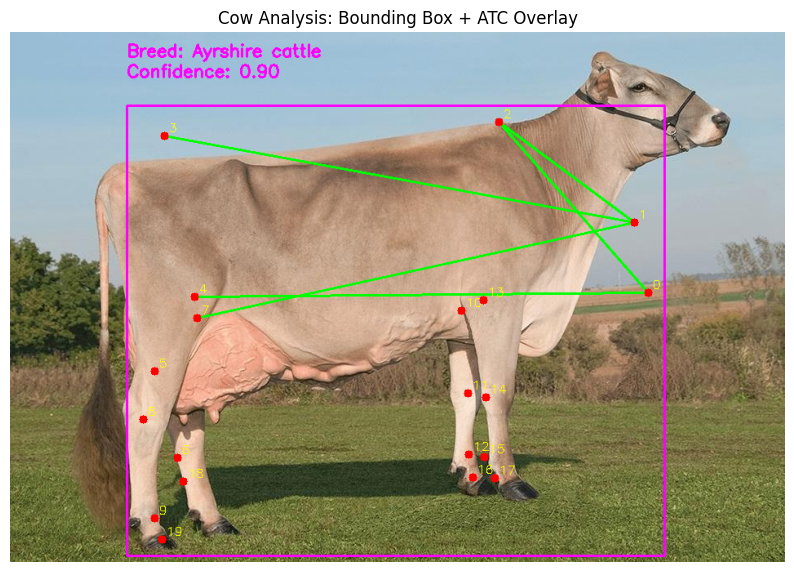

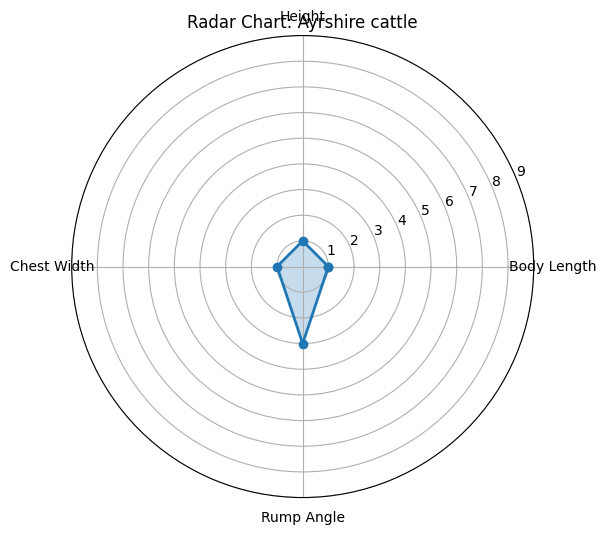

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def draw_results(img_path, keypoints, atc_scores, breed_name, confidence):
    # --- Load image ---
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- Draw skeleton ---
    kps = keypoints.astype(int)
    skeleton_pairs = [
        (0, 2),  # Withers ↔ Shoulder
        (2, 1),  # Shoulder ↔ Rump
        (0, 4),  # Withers ↔ Hoof
        (3, 1),  # Hip ↔ Rump
        (1, 7)   # Rump ↔ Tailhead
    ]
    for (p1, p2) in skeleton_pairs:
        cv2.line(img, tuple(kps[p1]), tuple(kps[p2]), (0, 255, 0), 2)

    # --- Draw keypoints ---
    for i, (x, y) in enumerate(kps):
        cv2.circle(img, (x, y), 5, (255, 0, 0), -1)
        cv2.putText(img, str(i), (x+5, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 1)

    # --- Draw bounding box around cow ---
    x_coords, y_coords = kps[:,0], kps[:,1]
    x_min, y_min = np.min(x_coords)-20, np.min(y_coords)-20
    x_max, y_max = np.max(x_coords)+20, np.max(y_coords)+20
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 255), 2)

    # --- Add breed, confidence, and ATC scores ---
    cv2.putText(img, f"Breed: {breed_name}", (x_min, y_min-60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,255), 2)
    cv2.putText(img, f"Confidence: {confidence:.2f}", (x_min, y_min-35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,255), 2)
    for idx, (trait, score) in enumerate(atc_scores.items()):
        cv2.putText(img, f"{trait}: {score}", (x_min, y_max + 25*(idx+1)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (200,0,0), 2)

    # --- Show image ---
    plt.figure(figsize=(10,8))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Cow Analysis: Bounding Box + ATC Overlay")
    plt.show()

    # --- Radar chart ---
    traits = list(atc_scores.keys())
    scores = list(atc_scores.values())
    angles = np.linspace(0, 2*np.pi, len(traits), endpoint=False)
    scores += scores[:1]  # wrap-around
    angles = np.append(angles, angles[0])

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, scores, marker='o', linewidth=2)
    ax.fill(angles, scores, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(traits)
    ax.set_yticks(range(1,10))
    ax.set_title(f"Radar Chart: {breed_name}")
    plt.show()

draw_results(img_path, keypoints, atc_scores_safe, breed_name, confidence)


In [ ]:
import json
import os

# --- Prepare results dictionary ---
results_dict = {
    "breed": breed_name,
    "confidence": float(confidence),
    "ATC_scores": {k:int(v) for k,v in atc_scores_safe.items()},
    "keypoints": keypoints.tolist()
}

# --- Save JSON ---
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)
json_path = os.path.join(output_dir, "cow_results.json")

with open(json_path, "w") as f:
    json.dump(results_dict, f, indent=4)

print(f"Results saved to {json_path}")


Results saved to results/cow_results.json


In [ ]:
# --- Imports ---
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from pinecone import Pinecone, ServerlessSpec
import os

# --- Initialize embedding & generation models ---
embed_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")  # 384 dim
gen_model_name = "google/flan-t5-small"
tokenizer = AutoTokenizer.from_pretrained(gen_model_name)
gen_model = AutoModelForSeq2SeqLM.from_pretrained(gen_model_name)

# --- Initialize Pinecone ---
os.environ["PINECONE_API_KEY"] = "pcsk_6q1DjW_Ew7zauktgZ3qiykoEAikosuzKsgL428au2XxjiG32uQyugBMTQR1epyTmbQwdyp"
pc = Pinecone(api_key=os.environ["PINECONE_API_KEY"])
index_name = "cattle-emb-384"

if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1")
    )

index = pc.Index(index_name)

# --- Example knowledge data to upsert ---
texts = [
    "Cows need 30-50 liters of water daily.",
    "Jersey cows produce high butterfat milk.",
    "Foot and Mouth Disease is common in cattle."
]

vectors = [(f"id-{i}", embed_model.encode([text])[0].tolist(), {"text": text}) for i, text in enumerate(texts)]
index.upsert(vectors=vectors)

# --- Question-answer function ---
def answer_question(question, top_k=2, max_tokens=100):
    # question
    q_emb = embed_model.encode([question])[0]

    # Retrieve top-K relevant docs from Pinecone
    res = index.query(vector=q_emb.tolist(), top_k=top_k, include_metadata=True)
    retrieved_texts = [m['metadata']['text'] for m in res['matches']]

    # Prepare prompt
    context = " ".join(retrieved_texts)
    prompt = f"Answer the question based on the context below:\nContext: {context}\nQuestion: {question}\nAnswer:"

    #  Generate answer locally
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = gen_model.generate(**inputs, max_new_tokens=max_tokens)
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return answer

# --- Example ---
question = "How much water does a cow need daily?"
print("Answer:", answer_question(question))


Answer: 30-50 liters
